In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import torch
from torch.autograd import Variable
from torch import optim
import torch.nn as nn
import torch.nn.functional as F

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d  

In [4]:
import tensorflow
tensorflow.__version__

'1.14.0'

### Network build

In [3]:
class SSNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1,1)
        self.fc2 = nn.Linear(1,1)
        
        self.fc1.weight = nn.Parameter(Variable(torch.FloatTensor([[1.0]]), requires_grad=True))
        self.fc1.bias = nn.Parameter(Variable(torch.FloatTensor([1.0]), requires_grad=True))

    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = torch.pow(x, -1)
        x = self.fc2(x)
        
        return x

In [4]:
net = SSNet()
print(net)

data = [[1, 1], [2, 2], [3, 3], [4, 4], [5, 5]]

criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=2e-1)
# optimizer = optim.Adam(net.parameters(), lr=1e-3)

SSNet(
  (fc1): Linear(in_features=1, out_features=1, bias=True)
  (fc2): Linear(in_features=1, out_features=1, bias=True)
)


In [5]:
for epoch in range(5000):
    full_loss = 0
    for i, data2 in enumerate(data):
        X, Y = iter(data2)
        X, Y = (Variable(torch.FloatTensor([X]), requires_grad=True), 
                Variable(torch.FloatTensor([Y]), requires_grad=False))
        
        optimizer.zero_grad()
        outputs = net(X)
        loss = criterion(outputs, Y)
        loss.backward()
        optimizer.step()
        
        full_loss += loss.item()
        
    if (epoch % 1000 == 0):
        print("Epoch {} - loss: {}".format(epoch, full_loss))

Epoch 0 - loss: 12.684860795736313
Epoch 1000 - loss: 2.2889736723154783
Epoch 2000 - loss: 1.8965305807068944
Epoch 3000 - loss: 1.6862335419282317
Epoch 4000 - loss: 1.5470911711454391


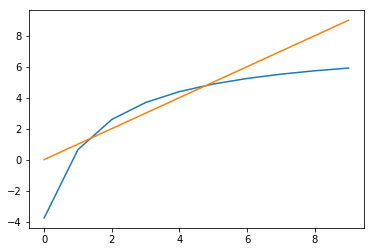

In [10]:
plt.plot([net(torch.FloatTensor([x])) for x in range(10)])
plt.plot(np.array(range(10)))

### Datasets

In [59]:
ort10_coltar10 = pd.read_csv('ort10_coltar10_mean.csv', header=None).values
ort10_colfeat10 = pd.read_csv('ort10_colfeat10_mean.csv', header=None).values
ort20 = pd.read_csv('ort20_mean.csv', header=None).values
ort5_coltar10_colfeat5 = pd.read_csv('ort5_coltar10_colfeat5_mean.csv', header=None).values
ort5_coltar15 = pd.read_csv('ort5_coltar15_mean.csv', header=None).values
ort10_coltar5_colfeat5 = pd.read_csv('ort10_coltar5_colfeat5_mean.csv', header=None).values
ort5_colfeat15 = pd.read_csv('ort5_colfeat15_mean.csv', header=None).values

ort10_coltar10_data = pd.read_csv('ort10_coltar10_data.csv', header=None).values
ort10_colfeat10_data = pd.read_csv('ort10_colfeat10_data.csv', header=None).values
ort20_data = pd.read_csv('ort20_data.csv', header=None).values
ort5_coltar10_colfeat5_data = pd.read_csv('ort5_coltar10_colfeat5_data.csv', header=None).values
ort5_coltar15_data = pd.read_csv('ort5_coltar15_data.csv', header=None).values
ort10_coltar5_colfeat5_data = pd.read_csv('ort10_coltar5_colfeat5_data.csv', header=None).values
ort5_colfeat15_data = pd.read_csv('ort5_colfeat15_data.csv', header=None).values

In [60]:
ort10_coltar10_matrix = np.cov(ort10_coltar10_data[:,:-1].T)
ort10_coltar10_cov = ort10_coltar10_matrix[np.triu_indices(ort10_coltar10_matrix.shape[0])]

ort10_colfeat10_matrix = np.cov(ort10_colfeat10_data[:,:-1].T)
ort10_colfeat10_cov = ort10_colfeat10_matrix[np.triu_indices(ort10_colfeat10_matrix.shape[0])]

ort20_matrix = np.cov(ort20_data[:,:-1].T)
ort20_cov = ort20_matrix[np.triu_indices(ort20_matrix.shape[0])]

ort5_coltar10_colfeat5_matrix = np.cov(ort5_coltar10_colfeat5_data[:,:-1].T)
ort5_coltar10_colfeat5_cov = ort5_coltar10_colfeat5_matrix[np.triu_indices(ort5_coltar10_colfeat5_matrix.shape[0])]

ort5_coltar15_matrix = np.cov(ort5_coltar15_data[:,:-1].T)
ort5_coltar15_cov = ort5_coltar15_matrix[np.triu_indices(ort5_coltar15_matrix.shape[0])]

ort10_coltar5_colfeat5_matrix = np.cov(ort10_coltar5_colfeat5_data[:,:-1].T)
ort10_coltar5_colfeat5_cov = ort10_coltar5_colfeat5_matrix[np.triu_indices(ort10_coltar5_colfeat5_matrix.shape[0])]

ort5_colfeat15_matrix = np.cov(ort5_colfeat15_data[:,:-1].T)
ort5_colfeat15_cov = ort5_colfeat15_matrix[np.triu_indices(ort5_colfeat15_matrix.shape[0])]

In [61]:
x = np.array(range(2, ort10_coltar10.shape[0] + 2))
feat = np.array(range(1, ort10_coltar10.shape[1] + 1))

In [62]:
class SSNet2D(nn.Module):
    def __init__(self, dim1=1, dim2=1, dim3=1):
        super().__init__()
        self.fc1 = nn.Linear(dim1, dim2)
        self.fc2 = nn.Linear(dim2, dim3)
        
        self.fc1.weight = nn.Parameter(Variable(torch.FloatTensor(np.ones((dim2, dim1))), requires_grad=True))
        self.fc1.bias = nn.Parameter(Variable(torch.FloatTensor(np.ones(dim2)), requires_grad=True))

    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = torch.pow(x, -1)
        x = self.fc2(x)
        
        return x

In [63]:
net = SSNet2D(len(x) + len(ort10_coltar10_cov), len(x), len(x))
print(net)

data = [[np.hstack((x, ort10_coltar10_cov)), ort10_coltar10[:,-1]], 
        [np.hstack((x, ort10_colfeat10_cov)), ort10_colfeat10[:,-1]], 
        [np.hstack((x, ort20_cov)), ort20[:,-1]], 
        [np.hstack((x, ort5_coltar10_colfeat5_cov)), ort5_coltar10_colfeat5[:,-1]],
        [np.hstack((x, ort5_coltar15_cov)), ort5_coltar15[:,-1]],
        [np.hstack((x, ort10_coltar5_colfeat5_cov)), ort10_coltar5_colfeat5[:,-1]],
        [np.hstack((x, ort5_colfeat15_cov)), ort5_colfeat15[:,-1]]]

criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=2e-1)
# optimizer = optim.Adam(net.parameters(), lr=1e-3)

SSNet2D(
  (fc1): Linear(in_features=411, out_features=180, bias=True)
  (fc2): Linear(in_features=180, out_features=180, bias=True)
)


In [64]:
for epoch in range(5001):
    full_loss = 0
    for i, data2 in enumerate(data):
        X, Y = iter(data2)
        X, Y = (Variable(torch.FloatTensor([X]), requires_grad=True), 
                Variable(torch.FloatTensor([Y]), requires_grad=False))
        
        optimizer.zero_grad()
        outputs = net(X)
        loss = criterion(outputs, Y)
        loss.backward()
        optimizer.step()
        
        full_loss += loss.item()
        
    if (epoch % 1000 == 0):
        print("Epoch {} - loss: {}".format(epoch, full_loss))

Epoch 0 - loss: 6.0512003898620605
Epoch 1000 - loss: 0.040316673927009106


KeyboardInterrupt: 

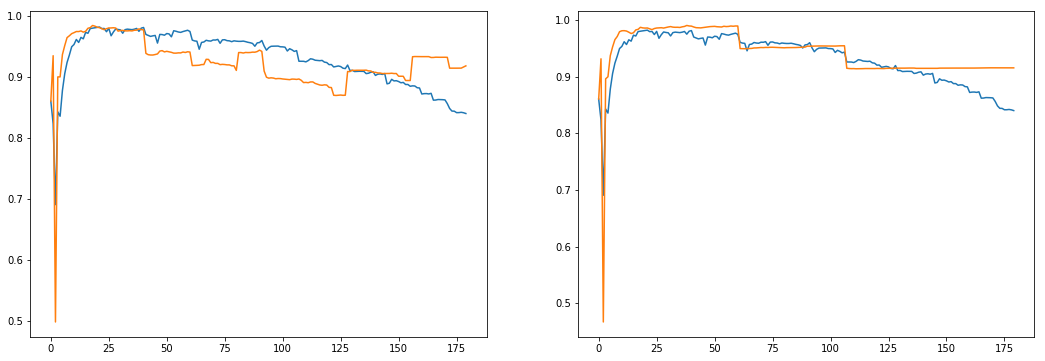

In [65]:
fig = plt.figure(figsize=(18,6))

ax = fig.add_subplot(121)
ax.plot(net(Variable(torch.FloatTensor([np.hstack((x, ort10_coltar10_cov))]))).data.numpy()[0])
ax.plot(ort10_coltar10[:,-1])

ax = fig.add_subplot(122)
ax.plot(net(Variable(torch.FloatTensor([np.hstack((x, ort10_colfeat10_cov))]))).data.numpy()[0])
ax.plot(ort10_colfeat10[:,-1])

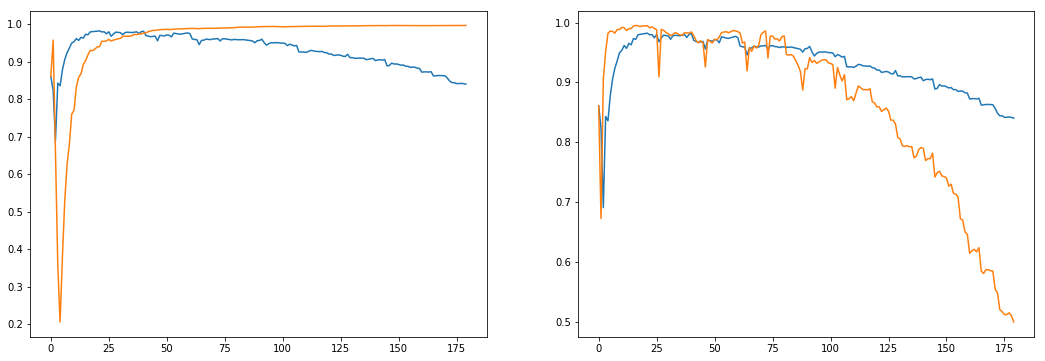

In [66]:
fig = plt.figure(figsize=(18,6))

ax = fig.add_subplot(121)
ax.plot(net(Variable(torch.FloatTensor([np.hstack((x, ort20_cov))]))).data.numpy()[0])
ax.plot(ort20[:,-1])

ax = fig.add_subplot(122)
ax.plot(net(Variable(torch.FloatTensor([np.hstack((x, ort5_coltar10_colfeat5_cov))]))).data.numpy()[0])
ax.plot(ort5_coltar10_colfeat5[:,-1])

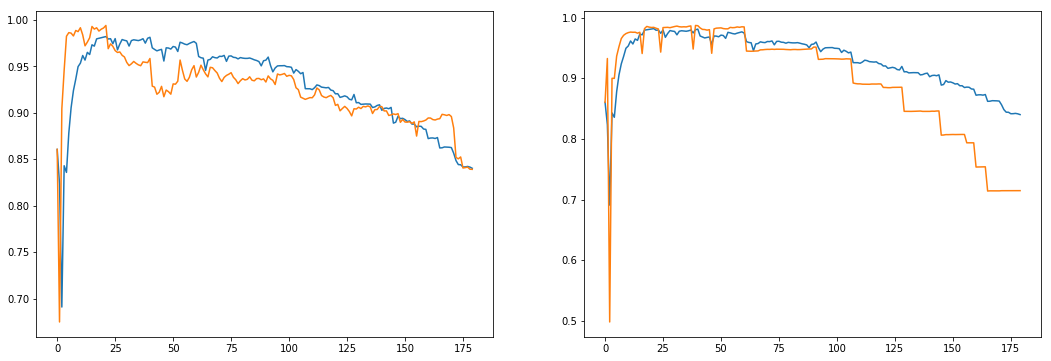

In [67]:
fig = plt.figure(figsize=(18,6))

ax = fig.add_subplot(121)
ax.plot(net(Variable(torch.FloatTensor([np.hstack((x, ort5_coltar15_cov))]))).data.numpy()[0])
ax.plot(ort5_coltar15[:,-1])

ax = fig.add_subplot(122)
ax.plot(net(Variable(torch.FloatTensor([np.hstack((x, ort10_coltar5_colfeat5_cov))]))).data.numpy()[0])
ax.plot(ort10_coltar5_colfeat5[:,-1])

Грабовой: метод Белсли, первая строчка таблицы

bias + error


---

Text(0.5, 0, 'Number of used features')

Text(0.5, 0, 'Amount of used data')

Text(0.5, 0, 'Model error')

Text(0.5, 0, 'Number of used features')

Text(0.5, 0, 'Amount of used data')

Text(0.5, 0, 'Model error')

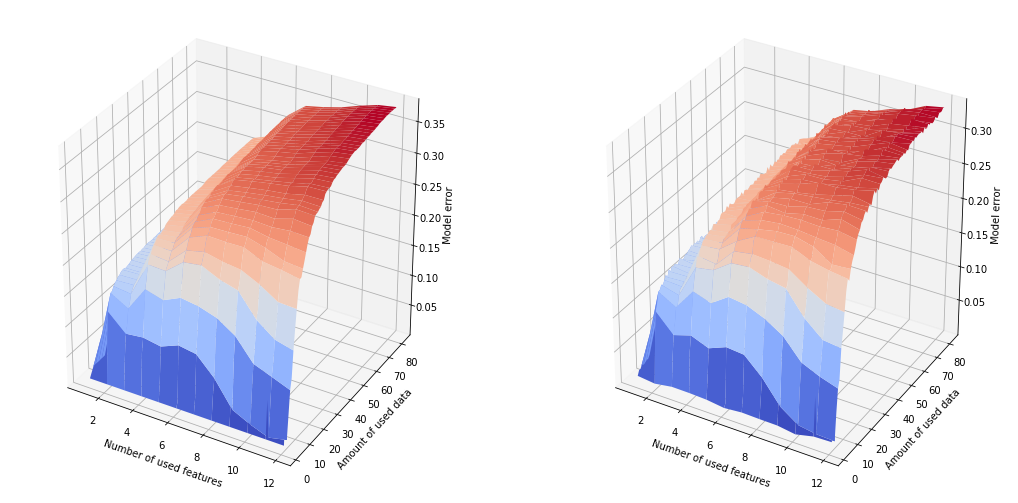

In [22]:
xv, yv = np.meshgrid(feat, x)

fig = plt.figure(figsize=(18,9))

ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(xv, yv, boston_mean, cmap=cm.coolwarm, linewidth=0)

ax.set_xlabel("Number of used features")
ax.set_ylabel("Amount of used data")
ax.set_zlabel("Model error")

ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(xv, yv, boston_net, cmap=cm.coolwarm, linewidth=0)

ax.set_xlabel("Number of used features")
ax.set_ylabel("Amount of used data")
ax.set_zlabel("Model error")

plt.show()

- Дисперсия ошибки
- Аппроксимация ошибки
- Ошибка аппроксимации

Ошибка: смещение + дисперсия

N признаков дают ошибку Х с дисперсией У

#### With covariance

In [23]:
boston_mean = pd.read_csv('boston_mean.csv', header=None).values
ort_col_mean = pd.read_csv('ort_col_mean.csv', header=None).values
ort_mean = pd.read_csv('ort_mean.csv', header=None).values

boston_data = pd.read_csv('boston_data.csv', header=None).values
ort_col_data = pd.read_csv('ort_col_data.csv', header=None).values
ort_data = pd.read_csv('ort_data.csv', header=None).values

In [24]:
boston_cov_matrix = np.cov(boston_data[:,:-1].T)
boston_cov = boston_cov_matrix[np.triu_indices(boston_cov_matrix.shape[0])]

ort_col_cov_matrix = np.cov(ort_col_data[:,:-1].T)
ort_col_cov = ort_col_cov_matrix[np.triu_indices(ort_col_cov_matrix.shape[0])]

ort_cov_matrix = np.cov(ort_data[:,:-1].T)
ort_cov = ort_cov_matrix[np.triu_indices(ort_cov_matrix.shape[0])]

In [25]:
x = np.array(range(2, boston_mean.shape[0] + 2))
feat = np.array(range(1, boston_mean.shape[1] + 1))

In [18]:
class SSNet(nn.Module):
    def __init__(self, dim1=1, dim2=1, dim3=1):
        super().__init__()
        self.fc1 = nn.Linear(dim1, dim2)
        self.fc2 = nn.Linear(dim2, dim3)
        
        self.fc1.weight = nn.Parameter(Variable(torch.FloatTensor(np.ones((dim2, dim1))), requires_grad=True))
        self.fc1.bias = nn.Parameter(Variable(torch.FloatTensor(np.ones(dim2)), requires_grad=True))

    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = torch.pow(x, -1)
        x = self.fc2(x)
        
        return x

In [46]:
net = SSNet(len(x) + len(boston_cov), len(boston_mean.reshape(-1)), len(boston_mean.reshape(-1)))
print(net)

data = [[np.hstack((x, boston_cov)), boston_mean.reshape(-1)], 
        [np.hstack((x, ort_col_cov)), ort_col_mean.reshape(-1)], 
        [np.hstack((x, ort_cov)), ort_mean.reshape(-1)]]

criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=1e-1)
# optimizer = optim.Adam(net.parameters(), lr=1e-3)

SSNet(
  (fc1): Linear(in_features=171, out_features=960, bias=True)
  (fc2): Linear(in_features=960, out_features=960, bias=True)
)


In [47]:
for epoch in range(1001):
    full_loss = 0
    for i, data2 in enumerate(data):
        X, Y = iter(data2)
        X, Y = (Variable(torch.FloatTensor([X]), requires_grad=True), 
                Variable(torch.FloatTensor([Y]), requires_grad=False))
        
        optimizer.zero_grad()
        outputs = net(X)
        loss = criterion(outputs, Y)
        loss.backward()
        optimizer.step()
        
        full_loss += loss.item()
        
    if (epoch % 500 == 0):
        print("Epoch {} - loss: {}".format(epoch, full_loss))

Epoch 0 - loss: 1.8676812276244164
Epoch 500 - loss: 1.1524091521278024
Epoch 1000 - loss: 0.7695883484557271


In [48]:
boston_net = net(torch.FloatTensor([np.hstack((x, boston_cov))])).data.numpy().reshape(len(x), len(feat))
ort_col_net = net(torch.FloatTensor([np.hstack((x, ort_col_cov))])).data.numpy().reshape(len(x), len(feat))
ort_net = net(torch.FloatTensor([np.hstack((x, ort_cov))])).data.numpy().reshape(len(x), len(feat))

Text(0.5, 0, 'Number of used features')

Text(0.5, 0, 'Amount of used data')

Text(0.5, 0, 'Model error')

Text(0.5, 0, 'Number of used features')

Text(0.5, 0, 'Amount of used data')

Text(0.5, 0, 'Model error')

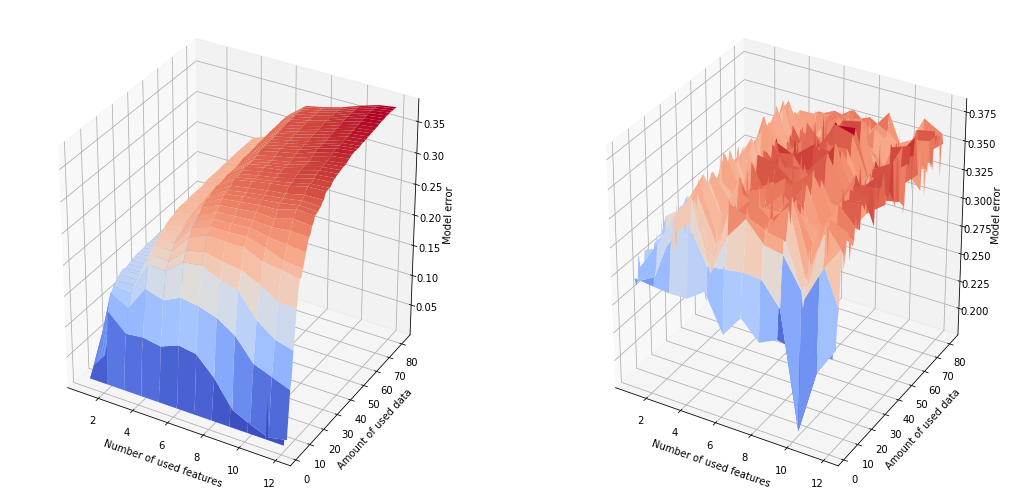

In [49]:
xv, yv = np.meshgrid(feat, x)

fig = plt.figure(figsize=(18,9))

ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(xv, yv, boston_mean, cmap=cm.coolwarm, linewidth=0)

ax.set_xlabel("Number of used features")
ax.set_ylabel("Amount of used data")
ax.set_zlabel("Model error")

ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(xv, yv, boston_net, cmap=cm.coolwarm, linewidth=0)

ax.set_xlabel("Number of used features")
ax.set_ylabel("Amount of used data")
ax.set_zlabel("Model error")

plt.show()

Text(0.5, 0, 'Number of used features')

Text(0.5, 0, 'Amount of used data')

Text(0.5, 0, 'Model error')

Text(0.5, 0, 'Number of used features')

Text(0.5, 0, 'Amount of used data')

Text(0.5, 0, 'Model error')

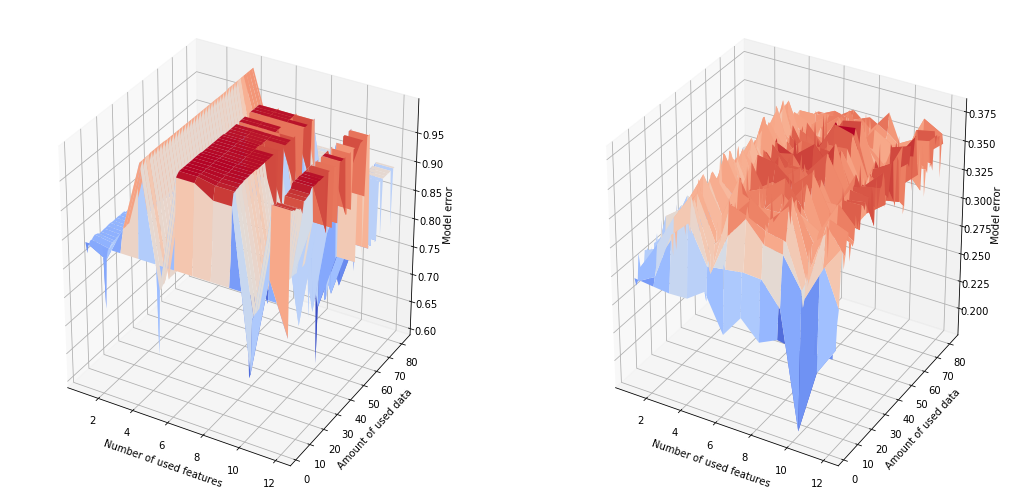

In [50]:
xv, yv = np.meshgrid(feat, x)

fig = plt.figure(figsize=(18,9))

ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(xv, yv, ort_col_mean, cmap=cm.coolwarm, linewidth=0)

ax.set_xlabel("Number of used features")
ax.set_ylabel("Amount of used data")
ax.set_zlabel("Model error")

ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(xv, yv, ort_col_net, cmap=cm.coolwarm, linewidth=0)

ax.set_xlabel("Number of used features")
ax.set_ylabel("Amount of used data")
ax.set_zlabel("Model error")

plt.show()

Text(0.5, 0, 'Number of used features')

Text(0.5, 0, 'Amount of used data')

Text(0.5, 0, 'Model error')

Text(0.5, 0, 'Number of used features')

Text(0.5, 0, 'Amount of used data')

Text(0.5, 0, 'Model error')

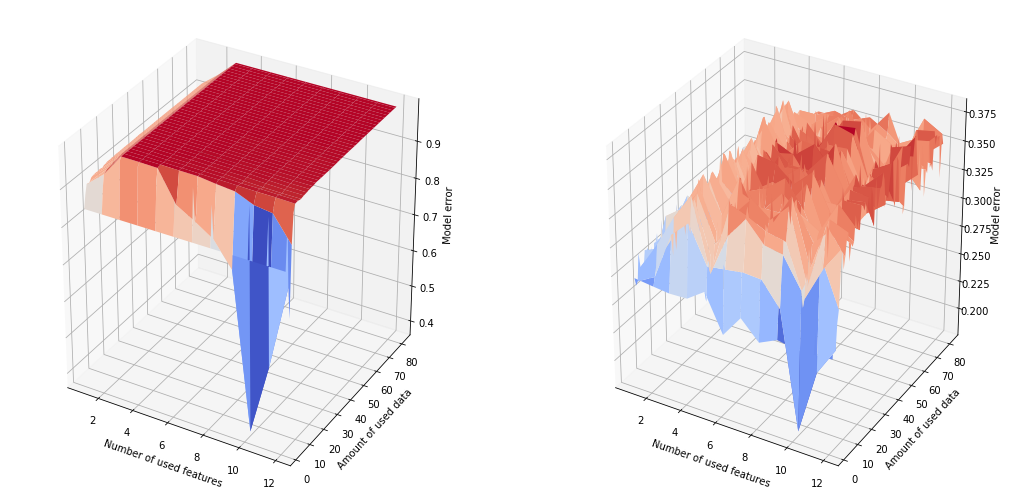

In [51]:
xv, yv = np.meshgrid(feat, x)

fig = plt.figure(figsize=(18,9))

ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(xv, yv, ort_mean, cmap=cm.coolwarm, linewidth=0)

ax.set_xlabel("Number of used features")
ax.set_ylabel("Amount of used data")
ax.set_zlabel("Model error")

ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(xv, yv, ort_net, cmap=cm.coolwarm, linewidth=0)

ax.set_xlabel("Number of used features")
ax.set_ylabel("Amount of used data")
ax.set_zlabel("Model error")

plt.show()

### VIF

In [5]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy

In [6]:
ort10_coltar10 = pd.read_csv('ort10_coltar10_mean.csv', header=None).values
ort10_colfeat10 = pd.read_csv('ort10_colfeat10_mean.csv', header=None).values
ort20 = pd.read_csv('ort20_mean.csv', header=None).values
ort5_coltar10_colfeat5 = pd.read_csv('ort5_coltar10_colfeat5_mean.csv', header=None).values
ort5_coltar15 = pd.read_csv('ort5_coltar15_mean.csv', header=None).values
ort10_coltar5_colfeat5 = pd.read_csv('ort10_coltar5_colfeat5_mean.csv', header=None).values
ort5_colfeat15 = pd.read_csv('ort5_colfeat15_mean.csv', header=None).values
ort15_colfeat5 = pd.read_csv('ort15_colfeat5_mean.csv', header=None).values
ort5_coltar5_colfeat10 = pd.read_csv('ort5_coltar5_colfeat10_mean.csv', header=None).values

ort10_coltar10_data = pd.read_csv('ort10_coltar10_data.csv', header=None)
ort10_colfeat10_data = pd.read_csv('ort10_colfeat10_data.csv', header=None)
ort20_data = pd.read_csv('ort20_data.csv', header=None)
ort5_coltar10_colfeat5_data = pd.read_csv('ort5_coltar10_colfeat5_data.csv', header=None)
ort5_coltar15_data = pd.read_csv('ort5_coltar15_data.csv', header=None)
ort10_coltar5_colfeat5_data = pd.read_csv('ort10_coltar5_colfeat5_data.csv', header=None)
ort5_colfeat15_data = pd.read_csv('ort5_colfeat15_data.csv', header=None)
ort15_colfeat5_data = pd.read_csv('ort15_colfeat5_data.csv', header=None)
ort5_coltar5_colfeat10_data = pd.read_csv('ort5_coltar5_colfeat10_data.csv', header=None)

In [7]:
true_results = [
    ort10_coltar10,
    ort10_colfeat10,
    ort20,
    ort5_coltar10_colfeat5,
    ort5_coltar15,
    ort10_coltar5_colfeat5,
    ort5_colfeat15,
    ort15_colfeat5,
    ort5_coltar5_colfeat10
]

In [8]:
datasets = [
    ort10_coltar10_data,
    ort10_colfeat10_data,
    ort20_data,
    ort5_coltar10_colfeat5_data,
    ort5_coltar15_data,
    ort10_coltar5_colfeat5_data,
    ort5_colfeat15_data,
    ort15_colfeat5_data,
    ort5_coltar5_colfeat10_data
]

In [9]:
vifs = [
    np.linalg.inv(X.corr().values).diagonal() for X in datasets
]

In [10]:
x_input = np.array(range(2, ort5_coltar5_colfeat10.shape[0] + 2))
feat_input = np.array(range(1, ort5_coltar5_colfeat10.shape[1] + 1))

In [17]:
class SSNet(nn.Module):
    def __init__(self, dim1=1, dim2=1, dim3=1):
        super().__init__()
        self.fc1 = nn.Linear(dim1, dim2)
        self.fc2 = nn.Linear(dim2, dim3)
        
        self.fc1.weight = nn.Parameter(Variable(torch.FloatTensor(np.ones((dim2, dim1))), requires_grad=True))
        self.fc1.bias = nn.Parameter(Variable(torch.FloatTensor(np.ones(dim2)), requires_grad=True))

    def forward(self, x):
        x = self.fc1(x)
        x = F.leaky_relu(x)
        x = torch.pow(x+1e-10000, -1)
        x = self.fc2(x)
        
        return x

In [23]:
net = SSNet(len(x_input) + len(vifs[0]), 2000, len(datasets[0].values.reshape(-1)))
print(net)

data = [[np.hstack((x_input, sorted(vifs[i]))), datasets[i].values.reshape(-1)] for i in range(len(datasets))]

criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)
#optimizer = optim.Adam(net.parameters(), lr=1e-3)

SSNet(
  (fc1): Linear(in_features=202, out_features=2000, bias=True)
  (fc2): Linear(in_features=2000, out_features=22000, bias=True)
)


In [47]:
optimizer = optim.SGD(net.parameters(), lr=1)
for epoch in range(1001):
    full_loss = 0
    for i, data2 in enumerate(data):
        X, Y = iter(data2)
        X, Y = (Variable(torch.FloatTensor([X]), requires_grad=True), 
                Variable(torch.FloatTensor([Y]), requires_grad=False))
        
        optimizer.zero_grad()
        outputs = net(X)
        loss = criterion(outputs, Y)
        loss.backward()
        optimizer.step()
        
        full_loss += loss.item()
        
    if (epoch % 10 == 0):
        print("Epoch {} - loss: {}".format(epoch, full_loss))

Epoch 0 - loss: 64.2869644165039
Epoch 10 - loss: 63.24368906021118
Epoch 20 - loss: 62.2173490524292


KeyboardInterrupt: 

In [48]:
datasets[1].shape

(1000, 22)

In [49]:
true_results[1].shape

(180, 20)

In [50]:
results = [
    net(torch.FloatTensor([np.hstack((x_input, sorted(vifs[i])))])).data.numpy().reshape(datasets[0].shape[0],
                                                                                         datasets[0].shape[1]) 
    for i in range(len(datasets))
]

In [51]:
results[0]

array([[ 3.8087019e-04, -9.1173641e-02, -1.6028828e-04, ...,
        -6.6125253e-03, -7.5402576e-03,  3.6810052e-01],
       [ 9.7846532e-01, -3.7517800e-04,  4.2795661e-01, ...,
         5.1026043e-02,  2.2252394e-02,  9.1741800e-01],
       [ 1.9570345e+00,  2.5919884e-01, -1.2482569e-04, ...,
         2.1679419e-01,  2.1602696e-01,  7.2044176e-01],
       ...,
       [ 9.7570306e+02, -3.0898940e-04, -3.6856252e-01, ...,
        -2.4637803e-02, -2.0014009e-02,  1.3358325e-01],
       [ 9.7668109e+02,  4.7214189e-01,  3.4058455e-04, ...,
         3.8042787e-02,  3.6850579e-02,  9.2537159e-01],
       [ 9.7765887e+02, -1.8113757e-04, -6.5661997e-02, ...,
        -5.3108386e-03, -3.5351119e-03,  4.2970699e-01]], dtype=float32)

Text(0.5, 0, 'Number of used features')

Text(0.5, 0, 'Amount of used data')

Text(0.5, 0, 'Model error')

Text(0.5, 0, 'Number of used features')

Text(0.5, 0, 'Amount of used data')

Text(0.5, 0, 'Model error')

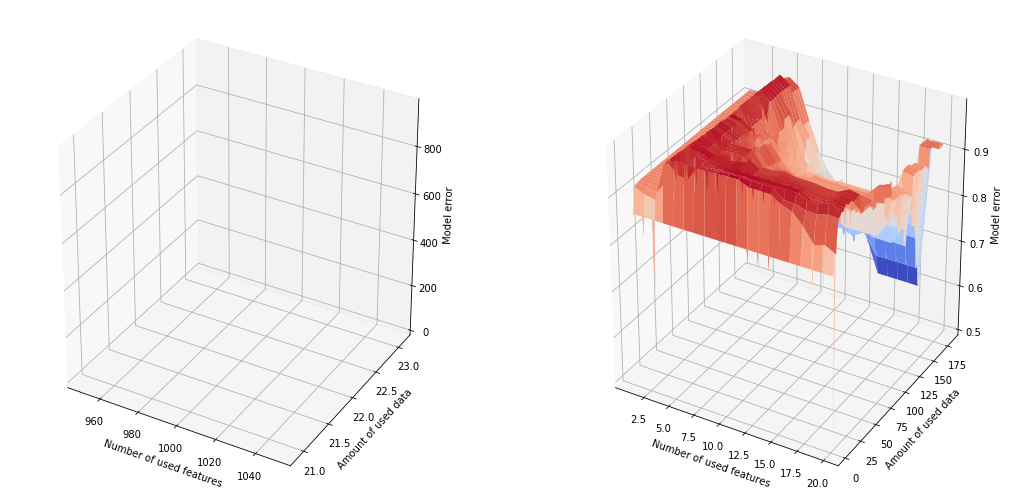

In [52]:
xv, yv = np.meshgrid(datasets[0].shape[0], datasets[0].shape[1])

fig = plt.figure(figsize=(18,9))

ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(xv, yv, results[0], cmap=cm.coolwarm, linewidth=0)

ax.set_xlabel("Number of used features")
ax.set_ylabel("Amount of used data")
ax.set_zlabel("Model error")

xv, yv = np.meshgrid(feat_input, x_input)

ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(xv, yv, true_results[0], cmap=cm.coolwarm, linewidth=0)

ax.set_xlabel("Number of used features")
ax.set_ylabel("Amount of used data")
ax.set_zlabel("Model error")

plt.show()

#### 2D

In [53]:
class SSNet2D(nn.Module):
    def __init__(self, dim1=1, dim2=1, dim3=1):
        super().__init__()
        self.fc1 = nn.Linear(dim1, dim2)
        self.fc2 = nn.Linear(dim2, dim3)
        
        self.fc1.weight = nn.Parameter(Variable(torch.FloatTensor(np.ones((dim2, dim1))), requires_grad=True))
        self.fc1.bias = nn.Parameter(Variable(torch.FloatTensor(np.ones(dim2)), requires_grad=True))

    def forward(self, x):
        x = self.fc1(x)
        x = F.leaky_relu(x)
        x = torch.pow(x, -1)
        x = self.fc2(x)
        
        return x

In [72]:
net = SSNet2D(len(x_input) + len(vifs[0]), len(datasets[i].values[:,-2]), len(datasets[i].values[:,-2]))
print(net)

data = [[np.hstack((x_input, sorted(vifs[i]))), datasets[i].values[:,-2]] for i in range(len(datasets))]

criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)
#optimizer = optim.Adam(net.parameters(), lr=1e-3)

SSNet2D(
  (fc1): Linear(in_features=202, out_features=1000, bias=True)
  (fc2): Linear(in_features=1000, out_features=1000, bias=True)
)


In [73]:
optimizer = optim.SGD(net.parameters(), lr=1)
for epoch in range(5001):
    full_loss = 0
    for i, data2 in enumerate(data):
        X, Y = iter(data2)
        X, Y = (Variable(torch.FloatTensor([X]), requires_grad=True), 
                Variable(torch.FloatTensor([Y]), requires_grad=False))
        
        optimizer.zero_grad()
        outputs = net(X)
        loss = criterion(outputs, Y)
        loss.backward()
        optimizer.step()
        
        full_loss += loss.item()
        
    if (epoch % 1000 == 0):
        print("Epoch {} - loss: {}".format(epoch, full_loss))

Epoch 0 - loss: 0.015831321943551302


KeyboardInterrupt: 

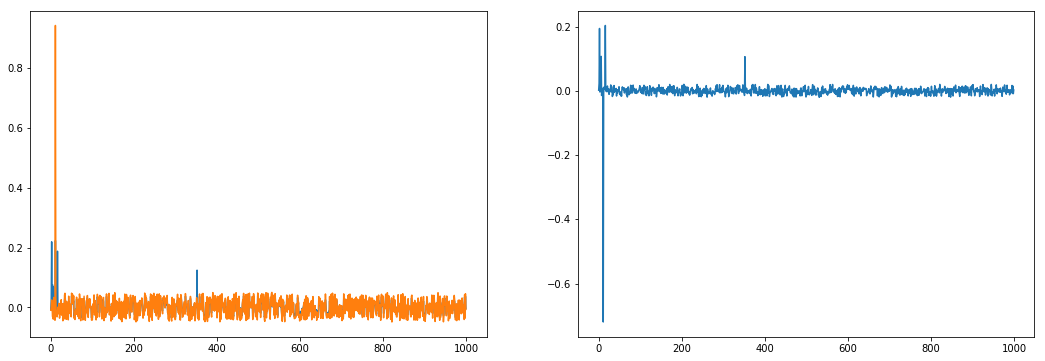

In [77]:
fig = plt.figure(figsize=(18,6))

ax = fig.add_subplot(121)
ax.plot(net(Variable(torch.FloatTensor([np.hstack((x_input, sorted(vifs[0])))]))).data.numpy()[0])
ax.plot(datasets[0].values[:,-2])

ax = fig.add_subplot(122)
ax.plot(net(Variable(torch.FloatTensor([np.hstack((x_input, sorted(vifs[0])))]))).data.numpy()[0] - datasets[0].values[:,-2])

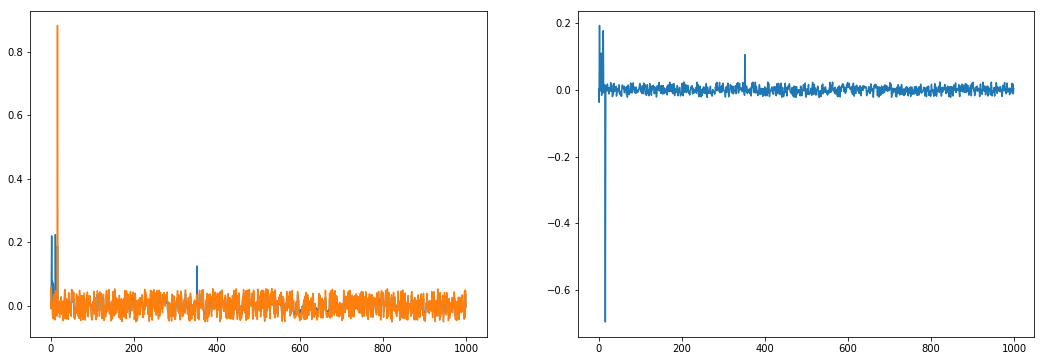

In [78]:
fig = plt.figure(figsize=(18,6))

ax = fig.add_subplot(121)
ax.plot(net(Variable(torch.FloatTensor([np.hstack((x_input, sorted(vifs[5])))]))).data.numpy()[0])
ax.plot(datasets[5].values[:,-2])

ax = fig.add_subplot(122)
ax.plot(net(Variable(torch.FloatTensor([np.hstack((x_input, sorted(vifs[5])))]))).data.numpy()[0] - datasets[5].values[:,-2])

In [82]:
fig = plt.figure(figsize=(18,6))

ax = fig.add_subplot(121)
ax.plot(np.exp(net(Variable(torch.FloatTensor([np.hstack((x_input, sorted(vifs[2])))]))).data.numpy()[0]))
ax.plot(np.exp(datasets[2].values[:,-2]))

ax = fig.add_subplot(122)
ax.plot(np.exp(net(Variable(torch.FloatTensor([np.hstack((x_input, sorted(vifs[2])))]))).data.numpy()[0]) - np.exp(datasets[2].values[:,-2]))

SyntaxError: invalid syntax (<ipython-input-82-acee71617dd3>, line 5)